In [13]:
import matplotlib.pyplot as plt
from skimage.io import imread
from glob import glob
import numpy as np
import os
from random import randint

In [2]:
img_glob = glob('/home/dspuser/' + '*.jpg')
img_glob

['/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img1046.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_2_Vegas_img1017.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_2_Vegas_img1063.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1072.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img109.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1023.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img1095.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_2_Vegas_img1030.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img1040.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_3_Paris_img1027.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_3_Paris_img1082.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_3_Paris_img103.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img106.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1053.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1049.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img100.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img105.jpg',
 '/

In [3]:
mask_path_list = []
GT_path = '/data/spacenet/bldg/data/pytorch-train/masks/0/'
for idx, path in enumerate(img_glob):
    img_name = os.path.splitext(os.path.split(path)[-1])[0] + '.tif'
    mask_path_list += [os.path.join(GT_path, img_name)]
mask_path_list

['/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_5_Khartoum_img1046.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_2_Vegas_img1017.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_2_Vegas_img1063.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_4_Shanghai_img1072.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_5_Khartoum_img109.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_4_Shanghai_img1023.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_5_Khartoum_img1095.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_2_Vegas_img1030.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_5_Khartoum_img1040.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_3_Paris_img1027.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_3_Paris_img1082

In [4]:
maskList = []
for idx, img in enumerate(mask_path_list):
    image = np.array(imread(img)[:,:,0])
    maskList += [image]
    
maskArr = np.array(maskList)

In [5]:
imgList = []
for idx, img in enumerate(img_glob):
    image = np.array(imread(img))
    imgList += [image]
    
imgArr = np.array(imgList)

In [6]:
imgArr.shape

(58, 256, 256)

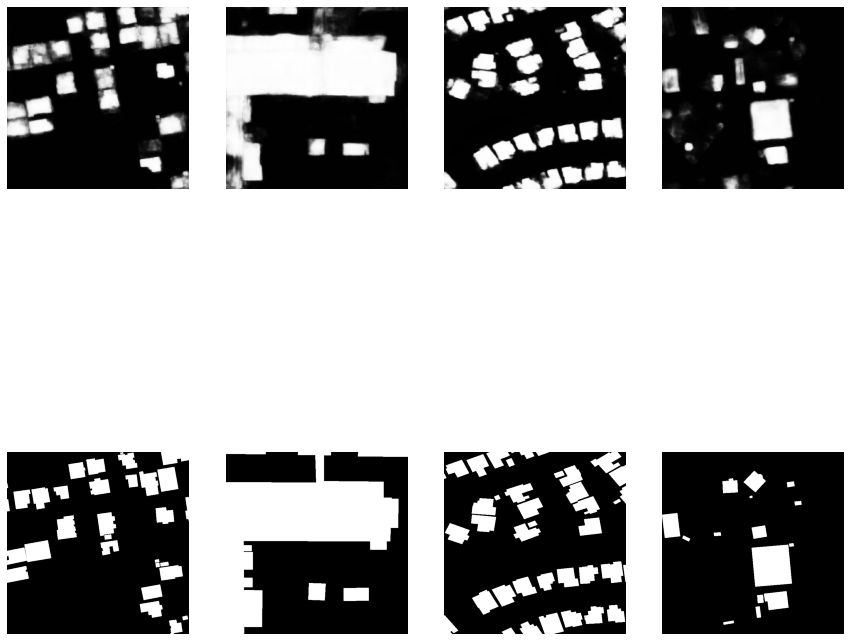

In [36]:
count = 4
randNum = randint(0, imgArr.shape[0]-count)
fig, axs = plt.subplots(2, count, figsize=(15, 15))
for idx, ax in enumerate(axs[0]):
    idx += randNum
    ax.imshow(imgArr[idx, :, :], cmap = 'Greys')
    ax.axis('off')
for idx, ax in enumerate(axs[1]):
    idx += randNum
    ax.imshow(maskArr[idx, :, :], cmap = 'Greys')
    ax.axis('off')        